In [130]:
# importing panda and numpy libraries
import pandas as pd
import numpy as np
import datetime as dat
import matplotlib.pyplot as plt

## Checkpoint 1: Data Cleaning and Preparation

In [131]:
#making data frame from Uber date set
uber_csv = "Uber Request Data.csv"
uber=pd.read_csv(uber_csv,sep =",",encoding="ISO8859-1")
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### 1.1 Converting timestamps to Date times

In [132]:
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'],errors='ignore', dayfirst=True)
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'],errors='ignore', dayfirst=True)
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


### 1.2 Adding pick_up and drop_times and Day_names

In [133]:
uber['pickup_time'] = uber['Request timestamp'].dt.time
uber['drop_time'] = uber['Drop timestamp'].dt.time
uber['Request_day'] = uber['Request timestamp'].dt.day_name()
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,pickup_time,drop_time,Request_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,13:00:00,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,18:47:00,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,09:58:00,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,22:03:00,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,09:25:47,Wednesday


In [134]:
uber['Weekend'] = uber['Request_day'].apply(lambda x: 1 if x in ('Sunday','Saturday') else 0)
uber.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,pickup_time,drop_time,Request_day,Weekend
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,13:00:00,Monday,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,18:47:00,Monday,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,09:58:00,Tuesday,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,22:03:00,Tuesday,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,09:25:47,Wednesday,0


### Extract day_time example : ('morning','afternoon','evening','night')

In [135]:
uber['day_time'] = pd.cut(uber['Request timestamp'].dt.hour, bins = [-1, 4, 8, 11, 16, 19, 23], labels=["Late Night","Early Morning","Morning", "Afternoon","Evening","Night"])
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,pickup_time,drop_time,Request_day,Weekend,day_time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,13:00:00,Monday,0,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,18:47:00,Monday,0,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,09:58:00,Tuesday,0,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,22:03:00,Tuesday,0,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,09:25:47,Wednesday,0,Early Morning


### Visually identify the most pressing problems for Uber from City to Airport

In [136]:
uber_city_airport =  uber[uber['Pickup point'] != 'Airport']
uber_city_airport.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,pickup_time,drop_time,Request_day,Weekend,day_time
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,09:58:00,Tuesday,0,Morning
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,09:25:47,Wednesday,0,Early Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17:57:27,18:50:51,Friday,0,Evening
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,06:46:00,07:25:00,Monday,0,Early Morning
11,1983,City,2.0,Trip Completed,2016-07-12 12:30:00,2016-07-12 12:57:00,12:30:00,12:57:00,Tuesday,0,Afternoon


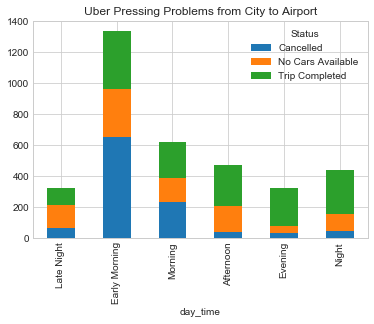

In [137]:
uber_city_airport = uber_city_airport.groupby(['day_time', 'Status'])['Status'].count().unstack('Status').fillna(0)

uber_city_airport.plot(kind='bar', stacked=True, title = 'Uber Pressing Problems from City to Airport')


### Visually identify the most pressing problems for Uber from Airport to City

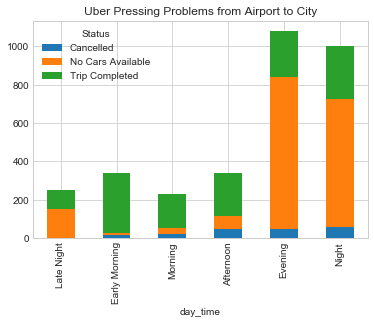

In [138]:
uber_airport_city =  uber[uber['Pickup point'] != 'City']
uber_airport_city.head()

uber_airport_city = uber_airport_city.groupby(['day_time', 'Status'])['Status'].count().unstack('Status').fillna(0)
#uber_count = uber_problems_city['Status']
uber_airport_city.plot(kind='bar', stacked=True, title = 'Uber Pressing Problems from Airport to City')



###  Supply and demand gap from City to Airport

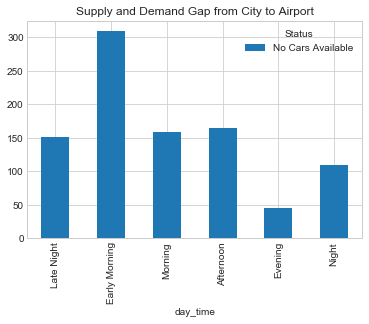

In [139]:
uber_sd =  uber[uber['Status'] == 'No Cars Available']

uber_sd_city_airport = uber_sd[uber_sd['Pickup point'] != 'Airport']

uber_sd_city_airport = uber_sd_city_airport.groupby(['day_time', 'Status'])['Status'].count().unstack('Status').fillna(0)
uber_sd_city_airport.plot(kind='bar', stacked=True, title = 'Supply and Demand Gap from City to Airport')



### Supply and Demand Gap from Airport to City

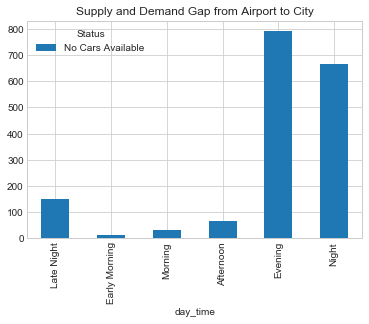

In [140]:

uber_sd_airport_city = uber_sd[uber_sd['Pickup point'] != 'City']

uber_sd_airport_city = uber_sd_airport_city.groupby(['day_time', 'Status'])['Status'].count().unstack('Status').fillna(0)
uber_sd_airport_city.plot(kind='bar', stacked=True, title = 'Supply and Demand Gap from Airport to City')



### Impact Analysis of days on Cancellations/ No car availabilty

Answer : No Impact

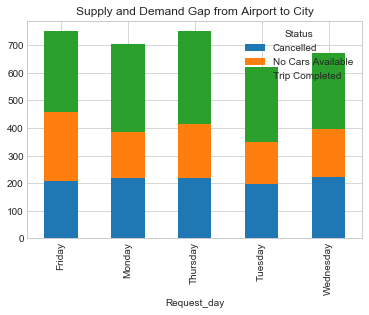

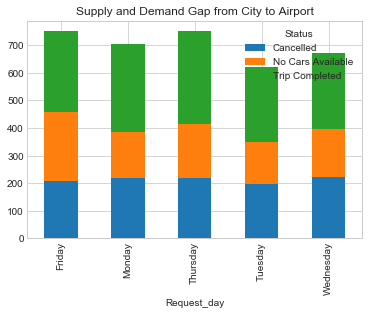

In [127]:

uber_sd_airport_city = uber[uber['Pickup point'] != 'Airport']

uber_sd_airport_city = uber_sd_airport_city.groupby(['Request_day', 'Status'])['Status'].count().unstack('Status').fillna(0)
uber_sd_airport_city.plot(kind='bar', stacked=True, title = 'Supply and Demand Gap from Airport to City')


uber_sd_city_airport = uber[uber['Pickup point'] != 'Airport']

uber_sd_city_airport = uber_sd_city_airport.groupby(['Request_day', 'Status'])['Status'].count().unstack('Status').fillna(0)
uber_sd_city_airport.plot(kind='bar', stacked=True, title = 'Supply and Demand Gap from City to Airport')



In [149]:
uber = uber.drop(columns=['Weekend', 'Request_day','Request id'])
uber.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,pickup_time,drop_time,day_time
0,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,13:00:00,Morning
1,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,18:47:00,Evening
2,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,09:58:00,Morning
3,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,22:03:00,Night
4,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,09:25:47,Early Morning
